In [147]:

import math as m
import numpy as np

from matplotlib import pyplot as plt
from scipy.special import voigt_profile
import pandas as pd
from xraydb import f0

In [148]:
lam = 1.54184
cell_p = 5.63904

$LP(\theta) = \frac{1 + \cos(2\theta)}{2\sin(2\theta)}$

$I(2\theta) = \sum_{j=1}^N I_j e^{-B(\theta - \theta_j)^2 + A}$

In [149]:
def str_amp(h,k,l,cords, brag_t):
    q = np.sin(brag_t) / lam
    res = 0
    for Z, V in cords.items():
        for i in range(len(V)):
            res += f0(Z, q) * np.exp(2* np.pi * 1j * np.dot([h,k,l], V[i]))
    return  res

In [150]:
cords ={11:[], 17:[]}

cords[11] = [
    [0.0,0.0,0.0],
    [0.5,0.5,0.0],
    [0.5,0.0,0.5],
    [0.0,0.5,0.5],
]
cords[17] = [
    [0.5,0.5,0.5],
    [0.0,0.0,0.5],
    [0.0,0.5,0.0],
    [0.5,0.0,0.0]
]

In [151]:
data = {'theta':[], 'theta_rad':[],'2_theta':[], 'hkl':[],'F':[], '|F|^2':[]}
pd.set_option('display.max_rows', None)
for h in range(-5,5):
    for k in range(-5,5):
        for l in range(-5,5):
            if not (h == 0 and k ==0 and l == 0):
                d = np.sqrt(cell_p ** 2 / (h ** 2 + k ** 2 + l **2))
                arg = lam / (2 * d)
                if -1 <= arg <= 1:
                    if h ==1 and k == 1 and l == 1:
                        pass
                    theta = np.arcsin(arg)
                    theta_deg = np.degrees(theta)
                    data['theta'].append(theta_deg)
                    data['2_theta'].append(f"{2*theta_deg:.4f}")
                    data['theta_rad'].append(theta)
                    data['hkl'].append((h,k,l))
                    f = str_amp(h,k,l,cords, theta)[0]
                    sqrt_f = abs(f)
                    data['F'].append(f"{sqrt_f:.4f}")
                    data['|F|^2'].append(abs(f)**2 if abs(f)**2 > 1e-5 else 0)

t = pd.DataFrame(data)
t = t.drop_duplicates(subset='2_theta')
t = t.sort_values(by='2_theta')
t

,theta,theta_rad,2_theta,hkl,F,|F|^2
94,50.656165,0.884117,101.3123,"(-4, -4, 0)",46.2984,2143.545366
21,51.752702,0.903255,103.5054,"(-5, -2, -2)",0.0000,0.000000
14,52.859420,0.922571,105.7188,"(-5, -3, 0)",0.0000,0.000000
13,53.978312,0.942099,107.9566,"(-5, -3, -1)",12.3120,151.584194
92,55.111558,0.961878,110.2231,"(-4, -4, -2)",44.2089,1954.422649
12,57.431079,1.002361,114.8622,"(-5, -3, -2)",0.0000,0.000000
6,61.089848,1.066219,122.1797,"(-5, -4, 0)",0.0000,0.000000
5,62.373589,1.088624,124.7472,"(-5, -4, -1)",0.0000,0.000000
11,63.698571,1.111750,127.3971,"(-5, -3, -3)",12.7020,161.341554
4,66.503826,1.160711,133.0077,"(-5, -4, -2)",0.0000,0.000000


In [152]:
tet = np.linspace(10,100,10000)
tet_rad = list(map(np.radians, tet))

In [153]:
def LP(theta):
    return (1 + np.cos(2 * theta)**2) / (np.sin(theta)**2 * np.cos(theta))

In [154]:
I = []
data['I'] = []
for i in range(len(data['2_theta'])):
    k = data['|F|^2'][i] * LP(data['theta_rad'][i]) 
    data['I'].append(k if k > 1e-5 else 0)

t = pd.DataFrame(data)
t[t['hkl'] == (2,0,0)]


,theta,theta_rad,2_theta,hkl,F,|F|^2,I
729,15.868023,0.276949,31.7360,"(2, 0, 0)",85.3894,7291.347672,174734.004103


In [155]:
def intense_gauss(t, N):
    B = np.log(2)/0.005**2
    Ans = 0
    for j in range(N):
        Ans += data['I'][j] * np.exp(-B*(t/2- (data['theta_rad'][j]))**2)
    return Ans

In [156]:
def intense_voigt(t, N, sigma, gamma):
    Ans = 0
    B = np.log(2)/0.1**2
    for j in range(N):
        Ans += data['I'][j] * voigt_profile(B*(t/2 - (data['theta_rad'][j])),sigma,gamma)
    return Ans

In [157]:
gauss = []
voigt = []

sigma = 0.1
gamma = 0.001
data['gauss_I'] = []
data['voigt_I'] = []
brag = list(set(data['theta_rad']))
N = len(data['theta'])
intenses = []
print('theta', 'gauss', 'voigt')
for t in tet_rad:
    g = intense_gauss(t, N)
    v = intense_voigt(t,N, sigma, gamma)
    gauss.append(g)
    voigt.append(v/4)



theta gauss voigt


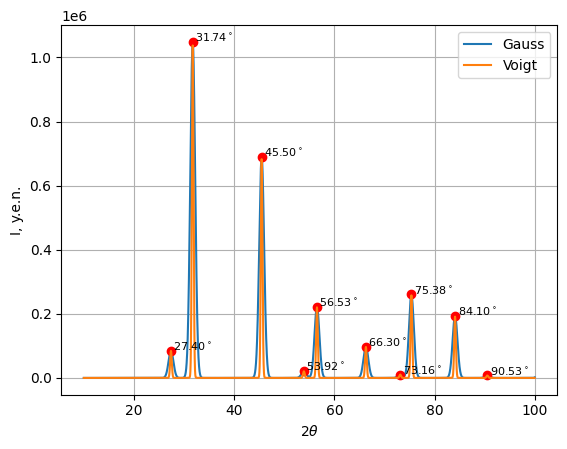

[27.39873987 31.73717372 45.49954995 53.92439244 56.53465347 66.30063006
 73.15931593 75.38253825 84.09540954 90.53105311]


In [175]:
from scipy.signal import find_peaks
hkl_peaks = np.array([(-1,-1,-1), (-2, 0, 0), (-2, -2, 0), (-3, -1, -1), (-2,-2,-2), (-4,0,0),(-3,-3,-1),(-4,-2,-0), (-4,-2,-2), (-5,-1,-1)])
peaks, _ = find_peaks(gauss)
gauss = np.array(gauss)
plt.plot(tet,gauss,label = 'Gauss')
plt.plot(tet[peaks], gauss[peaks], 'ro')
plt.ylabel('I, y.e.n.')
plt.xlabel(r'$2\theta, ^\circ$')
plt.grid(True)
plt.plot(tet,voigt,label = 'Voigt')
plt.legend()
tet_p = tet[peaks]

for i, tet_val in enumerate(tet_p):
    plt.annotate(f'{tet_val:.2f}$^\circ$', xy=(tet_val, gauss[peaks][i]),
                 xytext=(tet_val + 0.5, gauss[peaks][i] + 0.1),  # Сдвигаем аннотацию
                 fontsize=8)

plt.show()
print(tet[peaks])

